In [1]:
#cargamos las bibliotecas a utilizar y asignamos nombres cortos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
meteo = pd.read_excel('meteo-vid-2018.xlsx')

In [3]:
meteo.dtypes

Date                datetime64[ns]
Time                        object
batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                 float64
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)              float64
H. suelo 60                float64
Result2_Avg                float64
T. suelo 60 cm             float64
Result4_Avg         

In [4]:
df0=pd.DataFrame([])

#df0=pd.DataFrame({"TIME" : df0.TIMESTAMP,"TEMP" : df0.AirTC_Avg})

In [5]:
df0["MES"] = meteo["Date"].dt.month
df0["VelV"] = meteo["WS_ms_S_WVT"]
df0["T"] = meteo["AirTC_Avg"]
df0["RH"] = meteo["RH"]
df0["Rs"] = meteo["Rs_net_Avg"]

In [6]:
df0.head()

,MES,VelV,T,RH,Rs
0,1,2.33,27.75,20.61,36.01
1,1,3.12,26.57,25.25,22.34
2,1,2.54,25.01,26.45,1.40
3,1,2.01,23.65,29.22,-3.15
4,1,2.14,22.84,31.08,-2.84


In [7]:
df0["Tmax"] = df0.groupby(["MES"])["T"].transform("max")
df0["Tmin"] = df0.groupby(["MES"])["T"].transform("min")

df0["RHmax"] = df0.groupby(["MES"])["RH"].transform("max")
df0["RHmin"] = df0.groupby(["MES"])["RH"].transform("min")
df0["RHmean"] = df0.groupby(["MES"])["RH"].transform("mean")

df0["Vel"] = df0.groupby(["MES"])["VelV"].transform("mean")
df0["RS"] = df0.groupby(["MES"])["Rs"].transform("mean")

In [8]:
df0.head()

,MES,VelV,T,RH,Rs,Tmax,Tmin,RHmax,RHmin,RHmean,Vel,RS
0,1,2.33,27.75,20.61,36.01,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
1,1,3.12,26.57,25.25,22.34,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
2,1,2.54,25.01,26.45,1.40,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
3,1,2.01,23.65,29.22,-3.15,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
4,1,2.14,22.84,31.08,-2.84,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695


In [23]:
df=pd.DataFrame([])
df["Mes"]=df0["MES"]
df["Tmax"]=df0["Tmax"]
df["Tmin"]=df0["Tmin"]
df["RHmax"]=df0["RHmax"]
df["RHmin"]=df0["RHmin"]
df["RHmean"]=df0["RHmean"]
df["Vel"]=df0["Vel"]
df["RS"]=df0["RS"]

df1=df

In [24]:
df.head()

,Mes,Tmax,Tmin,RHmax,RHmin,RHmean,Vel,RS
0,1,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
1,1,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
2,1,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
3,1,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695
4,1,33.35,0.54,91.6,5.98,38.471432,1.943827,111.861695


In [26]:
df=df.drop_duplicates()
f=len(df)
df.index = np.arange(0,f)
lat=[]
long=[]
elev=[]
for i in range (0,f):
    a=28.918611
    o= -111.310639
    e= 101
    lat.append(a)
    long.append(o)
    elev.append(e)
df["Latitud"] = lat
df["Longitud"] = long
df["Elevacion"] = elev

In [31]:
df

,Mes,Tmax,Tmin,RHmax,RHmin,RHmean,Vel,RS,Latitud,Longitud,Elevacion
0,1,33.35,0.54,91.60,5.98,38.471432,1.943827,111.861695,28.918611,-111.310639,101
1,2,31.47,0.07,99.53,6.76,48.168006,1.964189,126.347812,28.918611,-111.310639,101
2,3,35.22,3.06,89.73,6.76,36.968353,1.926196,170.105269,28.918611,-111.310639,101
3,4,36.30,5.43,93.40,5.23,40.785667,2.101812,213.415993,28.918611,-111.310639,101
4,5,38.18,7.13,94.60,8.19,44.233468,2.113918,237.177688,28.918611,-111.310639,101
5,6,41.47,13.12,98.37,5.34,50.810507,2.154986,224.636062,28.918611,-111.310639,101
6,7,44.94,18.71,97.00,13.10,57.639805,2.022204,200.421983,28.918611,-111.310639,101
7,8,40.24,22.71,98.60,30.16,68.868454,1.910853,189.466922,28.918611,-111.310639,101
8,9,41.39,19.43,98.03,21.32,66.619750,1.790326,183.133271,28.918611,-111.310639,101
9,10,35.82,10.23,98.47,17.32,68.696082,1.664435,148.386203,28.918611,-111.310639,101


<Figure size 432x288 with 0 Axes>

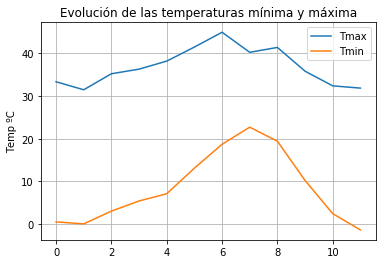

In [39]:
df1 = df[['Tmax', "Tmin"]]
fig=plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Evolución de las temperaturas mínima y máxima")
plt.ylabel("Temp ºC")
plt.grid(True)



plt.show()